<a href="https://colab.research.google.com/github/vbipin/aip/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [0]:
#why did I mix scipy stats norm and numpy :(
#happened. Sorry.

In [0]:
#from sklearn.datasets import load_boston
#from sklearn.linear_model import LinearRegression

In [0]:
#lets prepare some sample dummy data
#we create a line, and then sample points form the line with some random error

#line y = mx + c
#c is limited to [-0.5, +0.5]; this is just to manage the plotting of the line

In [0]:
def create_new_training_data_2d( ndata=100, random_seed=None ) :
    np.random.seed(random_seed)
    
    #we first select a slope randomly
    m = scipy.stats.norm.rvs(0, size=1)[0]
    #and an intercept
    c = scipy.stats.norm.rvs(0, size=1)[0]
    
    #always the same; easy to plot
    xtrain   = np.linspace(-1,1,ndata)
    
    #the line without any errors
    f_actual = m * xtrain + c
    
    #we crete the training y by introducing an 'error' to the actual y
    ytrain   = scipy.stats.norm.rvs(f_actual, size=ndata)
    
    return xtrain, ytrain, f_actual, m, c

def create_new_training_data( ndata=100, d=3, random_seed=None ) :
    """generate x with d-1 dim"""
    
    np.random.seed(random_seed)
    
    #we choose the d dim w randomly
    #w[0] is the bias term
    w = scipy.stats.norm.rvs(0, size=d)
    
    #We use nupy to have a ndata X d-1 matrix
    xtrain   = np.random.normal(0, size=(ndata, d-1))
    
    #the line without any errors
    f_actual = xtrain.dot(w[1:]) + w[0]
    
    #we crete the training y by introducing an 'error' to the actual y
    #numpy is wonderful :)
    ytrain   = np.random.normal(f_actual)
    
    return xtrain, ytrain, f_actual, w

def lineplot(x,y,f=None) :
    """just a convenient plot"""
    plt.scatter(x,y, color='blue')
    if f is not None:
        plt.scatter(x,f, color='orange')
        
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    

In [0]:
ndata = 100
xtrain, ytrain, f_actual, m, c = create_new_training_data_2d( ndata )

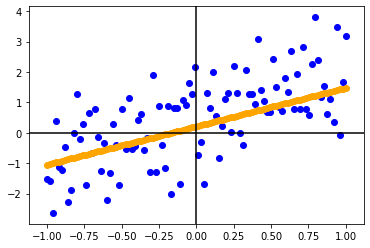

In [7]:
lineplot(xtrain, ytrain, f_actual)

In [0]:
#the above function in another form
x, y, f, w = create_new_training_data( d=2 )

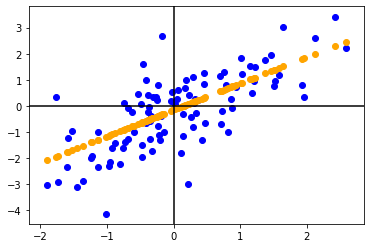

In [9]:
lineplot(x, y, f)

In [0]:

def linear_regression_2d(X, Y) :
    """returns parameters of the model"""
    #X has shape (Nx1) and Y has shape(N,1), M is the number of data points

    N = X.shape[0]
    
    #we initialize the parameters randomly
    w = np.random.rand() 
    bias = np.random.rand()

    
    for t in range(N * 10) : #iterate some 10 times over the whole data.
        
        alpha = 1/(t+1)**0.75 #we decay the alpha; (t+1) is to avoid divide by zero
        
        #take a random data point
        i = np.random.choice(range(N))
        x, y  = X[i], Y[i]

        h = w * x + bias
        #print(h.shape)
        delta_w = x * (h-y)
        delta_b = (h-y)
        
        #update the values according to the gradient
        w    -= alpha * delta_w
        bias -= alpha * delta_b
    
    return bias, w

In [0]:
####### lets do some sample testing

In [0]:
bias, slope = linear_regression_2d(xtrain.reshape(-1,1), ytrain)

In [0]:
xtest = np.linspace(-0.94,1,ndata).reshape(-1,2)

In [0]:
ypredict = [ slope*xt + bias for xt in xtrain]

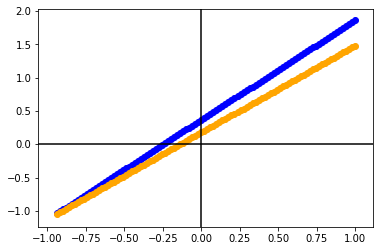

In [16]:
lineplot(xtest,ypredict,f_actual)

In [0]:
#Ok lets do the linear regression in the n dim case 